In [33]:
import pandas as pd 
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df1 = pd.read_csv('bank-additional-full.csv', na_values= 'unknown')
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EmpVarRate,ConsPriceIDX,ConsConfIDX,euribor3m,NrEmployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [35]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'EmpVarRate', 'ConsPriceIDX', 'ConsConfIDX',
       'euribor3m', 'NrEmployed', 'y'],
      dtype='object')

In [36]:
df1.dtypes

age               int64
job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
EmpVarRate      float64
ConsPriceIDX    float64
ConsConfIDX     float64
euribor3m       float64
NrEmployed        int64
y                object
dtype: object

In [37]:
catvars = [
    var for var in df1.columns if df1[var].dtype == 'O' and var != 'y'
    ]
    
df1[catvars] = df1[catvars].astype('O')
len(catvars)

10

In [38]:
numvars = [
    var for var in df1.columns if var not in catvars and var != "y"
]

len(numvars)

10

In [39]:
catvars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [40]:
numvars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'EmpVarRate',
 'ConsPriceIDX',
 'ConsConfIDX',
 'euribor3m',
 'NrEmployed']

In [41]:

vars_with_na = [var for var in df1.columns if df1[var].isnull().sum() > 0]
df1[vars_with_na].isnull().sum().sort_values(ascending=False)

default      8597
education    1731
housing       990
loan          990
job           330
marital        80
dtype: int64

In [42]:
df1['y'] = df1['y'].map({'yes': 1, 'no': 0})

df1.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EmpVarRate,ConsPriceIDX,ConsConfIDX,euribor3m,NrEmployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [43]:
cat_na = [var for var in catvars if var in vars_with_na]
num_na = [var for var in numvars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  6
Number of numerical variables with na:  0


In [44]:
from matplotlib.pyplot import ylabel
import numpy
from numpy import mean, std, where

def analyse_na_value(data, var):
    # copy of the dataframe, so that we do not override the original data
    data = data.copy()
    # let's make an interim variable that indicates 1 if the observation was missing or 0 otherwise
    data[var] = np.where(data[var].isnull(), 1, 0)
    plt.figure(figsize = (20, 10))
    plt.xlabel("Campaign", fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    cpg = sns.countplot(x = data[var], hue = data["y"], palette = "magma")
    cpg.set_title("campaign success", color = "blue", fontsize = 20)


    plt.show()

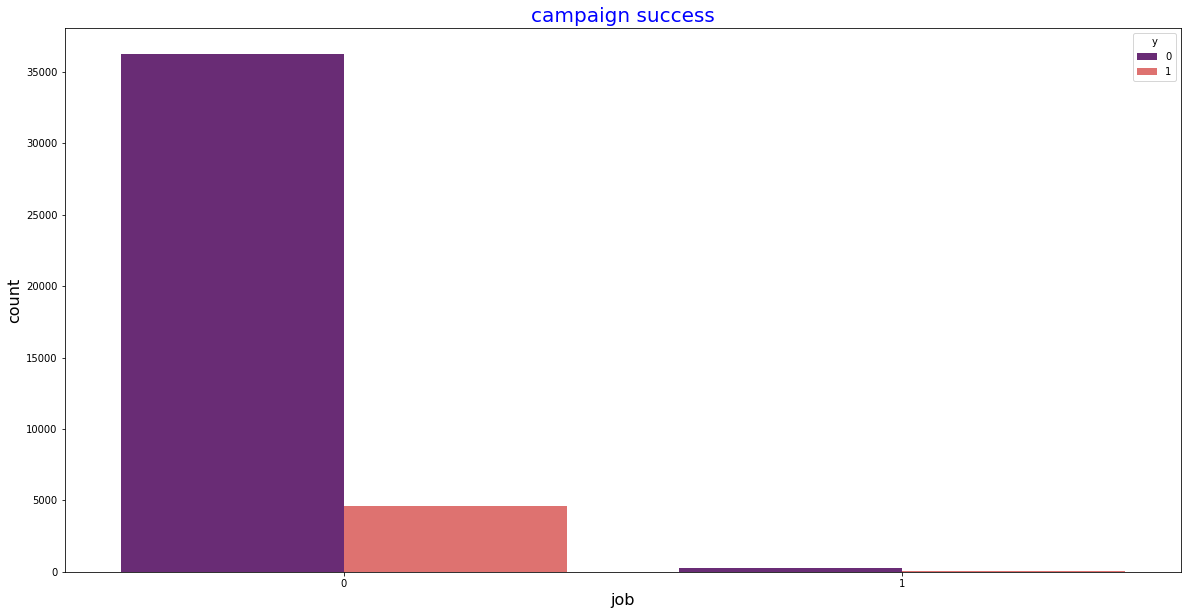

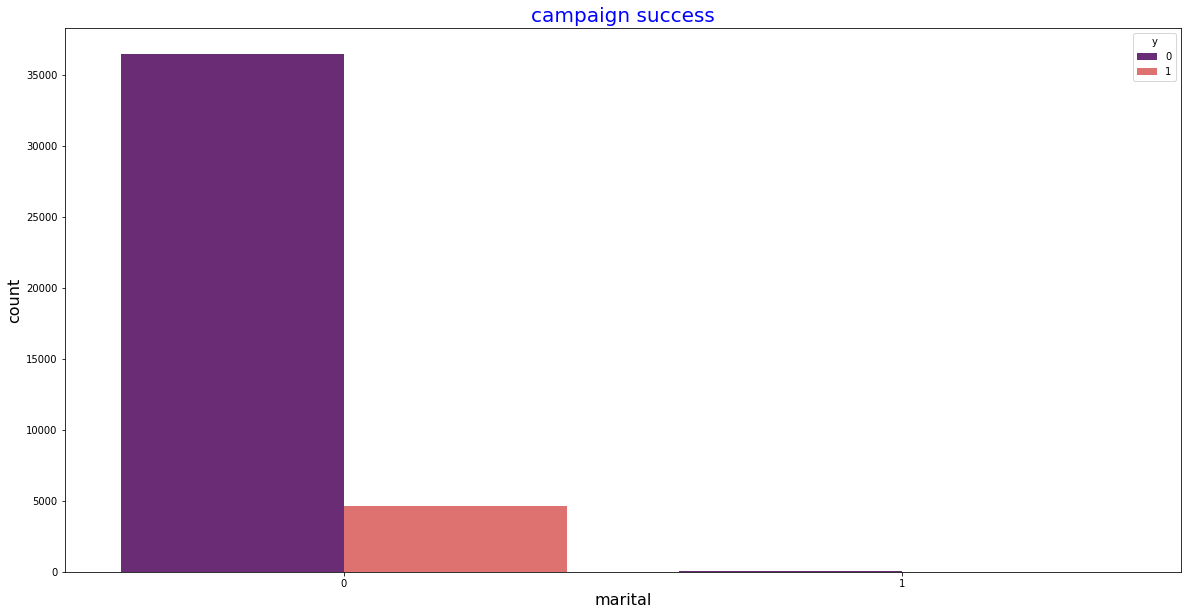

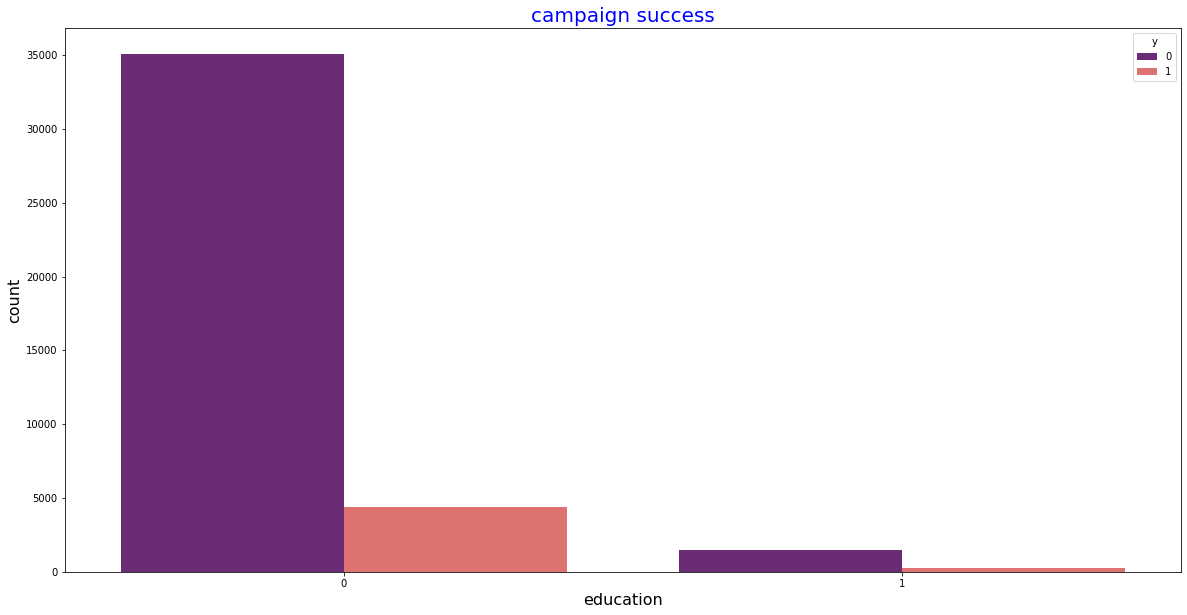

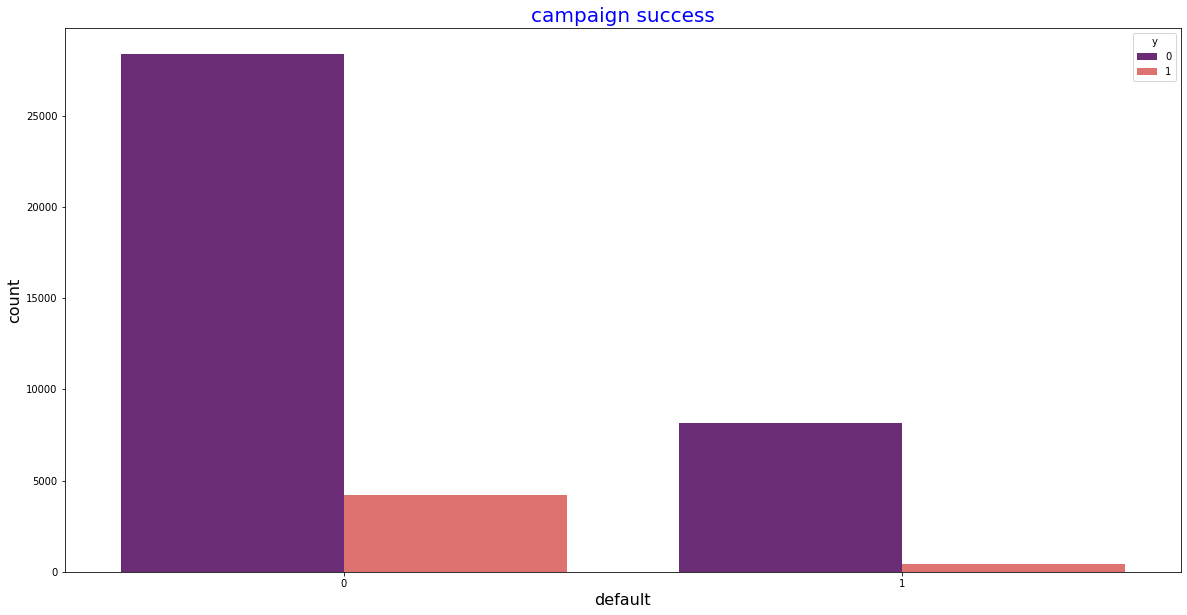

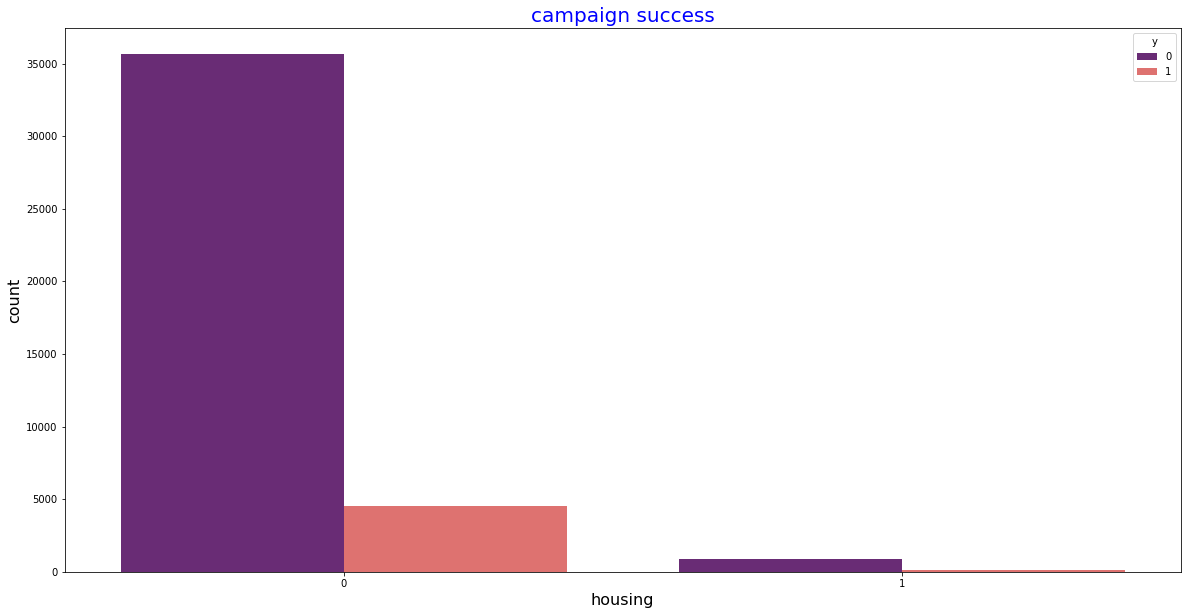

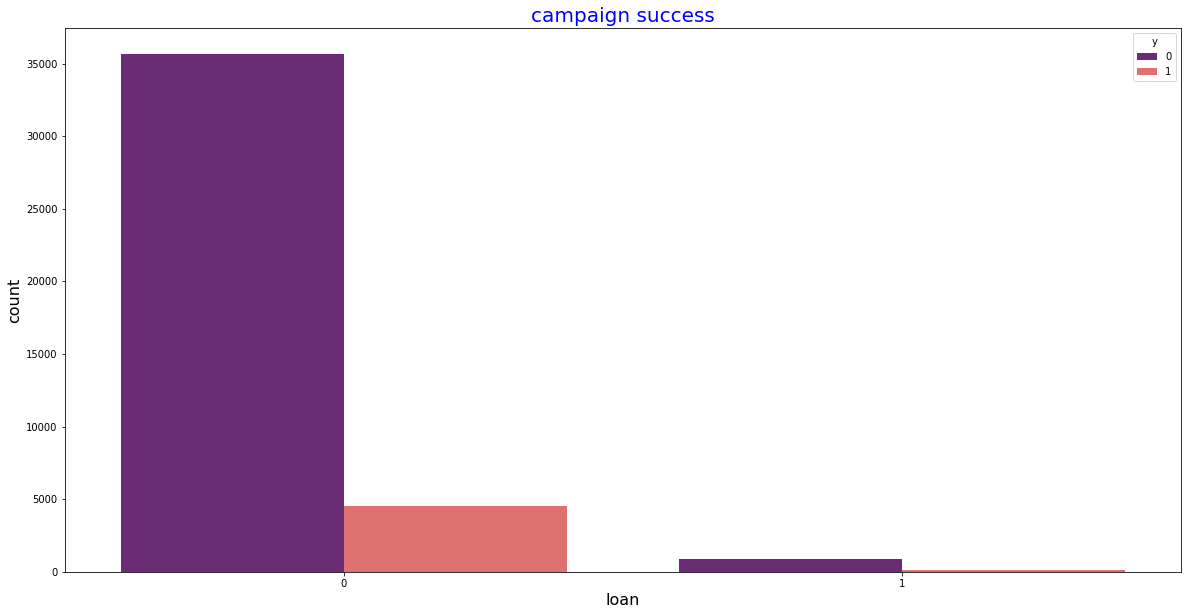

In [45]:
for var in vars_with_na:
    analyse_na_value(df1, var)

In [22]:
df = pd.read_csv('bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EmpVarRate,ConsPriceIDX,ConsConfIDX,euribor3m,NrEmployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [46]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

df1.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EmpVarRate,ConsPriceIDX,ConsConfIDX,euribor3m,NrEmployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [47]:
cat_vars = [
    var for var in df.columns if df[var].dtype == 'O' and var != 'y'
    ]
    
df[cat_vars] = df[cat_vars].astype('O')
len(cat_vars)

10

In [48]:
num_vars = [
    var for var in df.columns if var not in cat_vars and var != "y"
]

len(num_vars)

10

Splitting numerical variables into discrete and continuous

In [49]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 30]

print('Number of discrete variables: ', len(discrete_vars))
discrete_vars

Number of discrete variables:  6


['pdays',
 'previous',
 'EmpVarRate',
 'ConsPriceIDX',
 'ConsConfIDX',
 'NrEmployed']

In [50]:
df[discrete_vars].nunique()


pdays           27
previous         8
EmpVarRate      10
ConsPriceIDX    26
ConsConfIDX     26
NrEmployed      11
dtype: int64

In [51]:
df[discrete_vars].head()

,pdays,previous,EmpVarRate,ConsPriceIDX,ConsConfIDX,NrEmployed
0,999,0,1.1,93.994,-36.4,5191
1,999,0,1.1,93.994,-36.4,5191
2,999,0,1.1,93.994,-36.4,5191
3,999,0,1.1,93.994,-36.4,5191
4,999,0,1.1,93.994,-36.4,5191


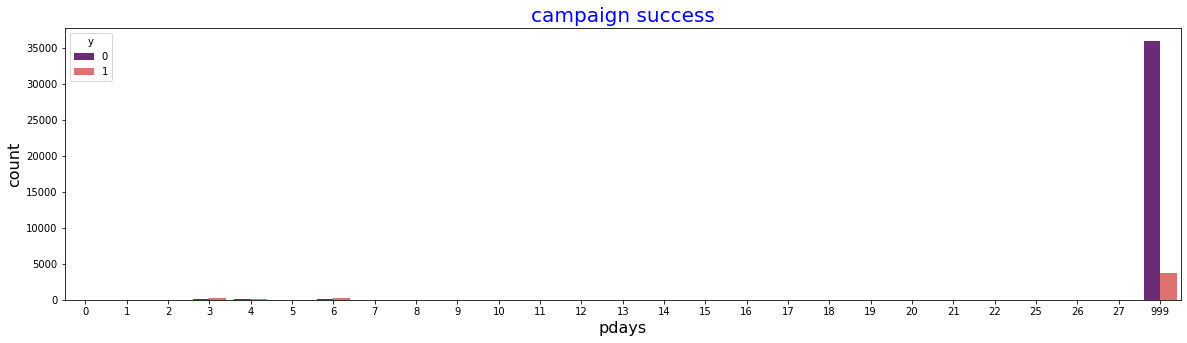

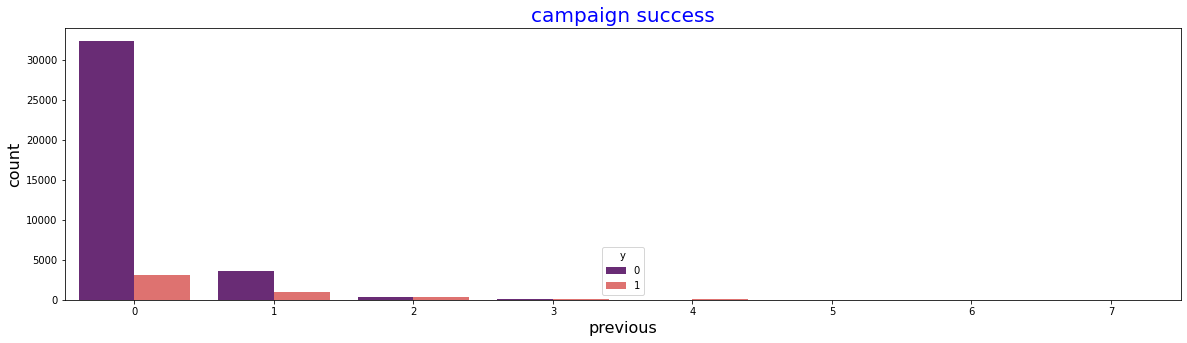

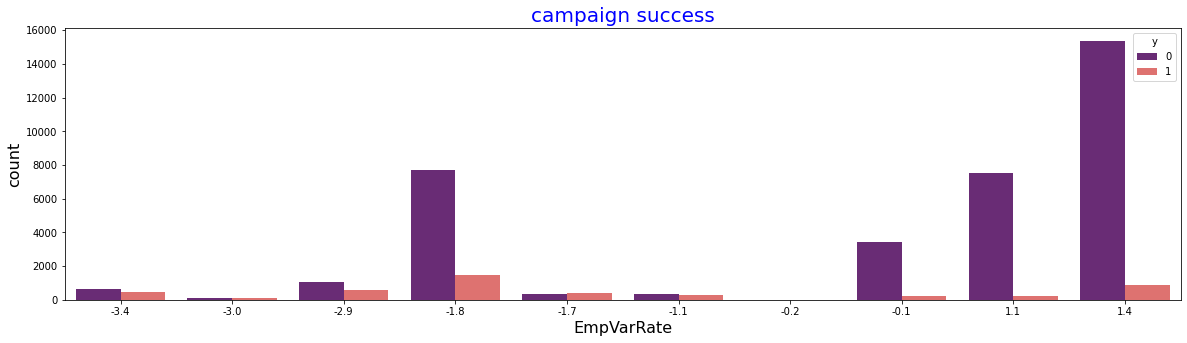

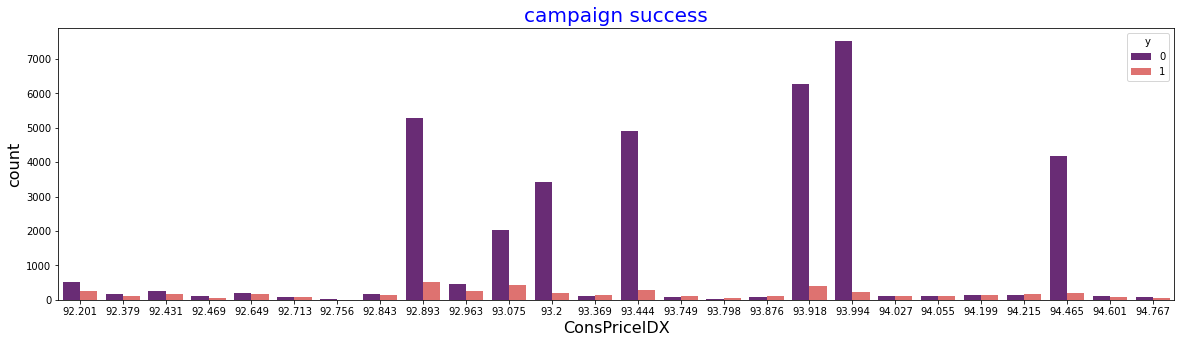

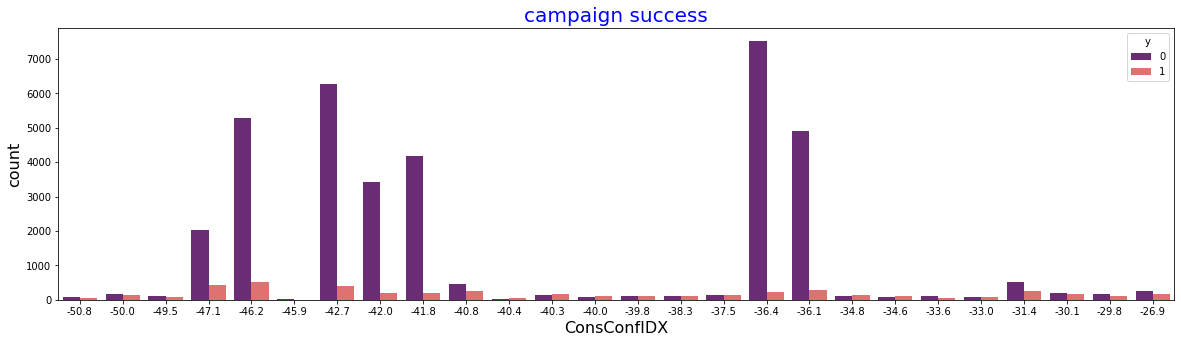

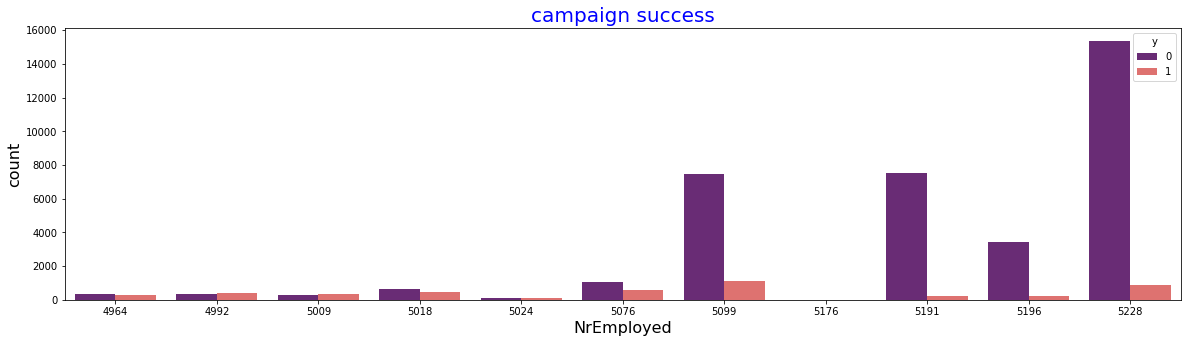

In [52]:
for var in discrete_vars:
    # make boxplot with Catplot
    #plt.subplots(2,3)
    plt.figure(figsize = (20, 5))
    plt.xlabel("Campaign", fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    cpg = sns.countplot(x = df[var], hue = df["y"], palette = "magma")
    cpg.set_title("campaign success", color = "blue", fontsize = 20)

    plt.show()

In [53]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  4


In [54]:
cont_vars

['age', 'duration', 'campaign', 'euribor3m']

In [55]:
df[cont_vars].head()

,age,duration,campaign,euribor3m
0,56,261,1,4.857
1,57,149,1,4.857
2,37,226,1,4.857
3,40,151,1,4.857
4,56,307,1,4.857


In [56]:
df[cont_vars].nunique()

age            78
duration     1544
campaign       42
euribor3m     316
dtype: int64

In [57]:
skewed = [
    'age','duration']

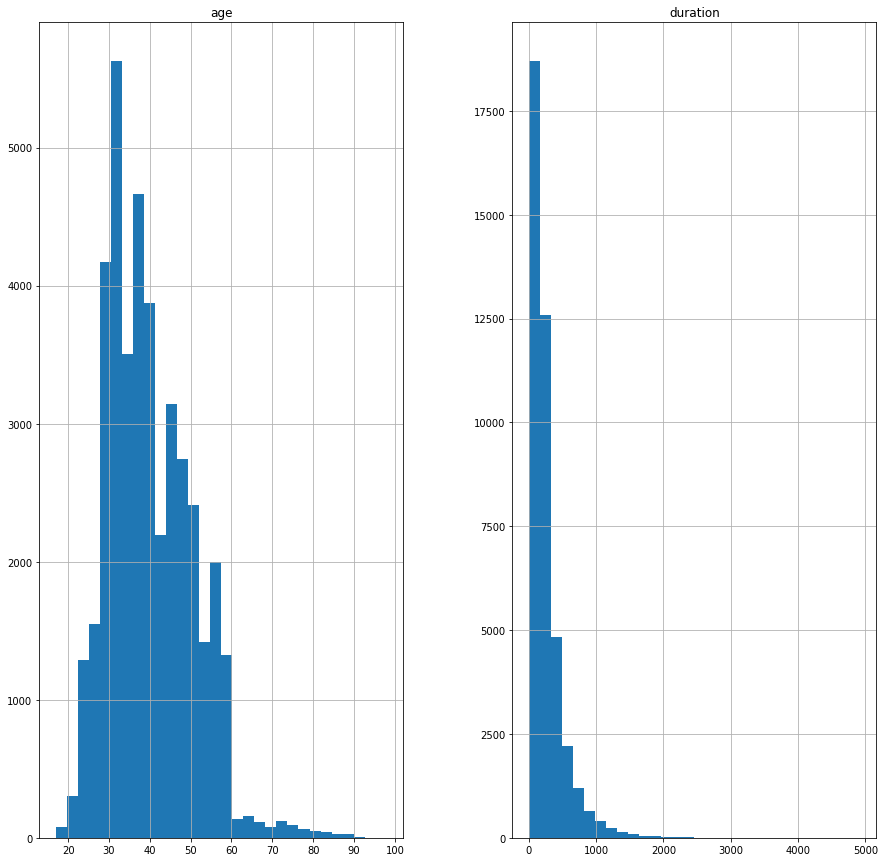

In [58]:
df[skewed].hist(bins=30, figsize=(15,15))
plt.show()

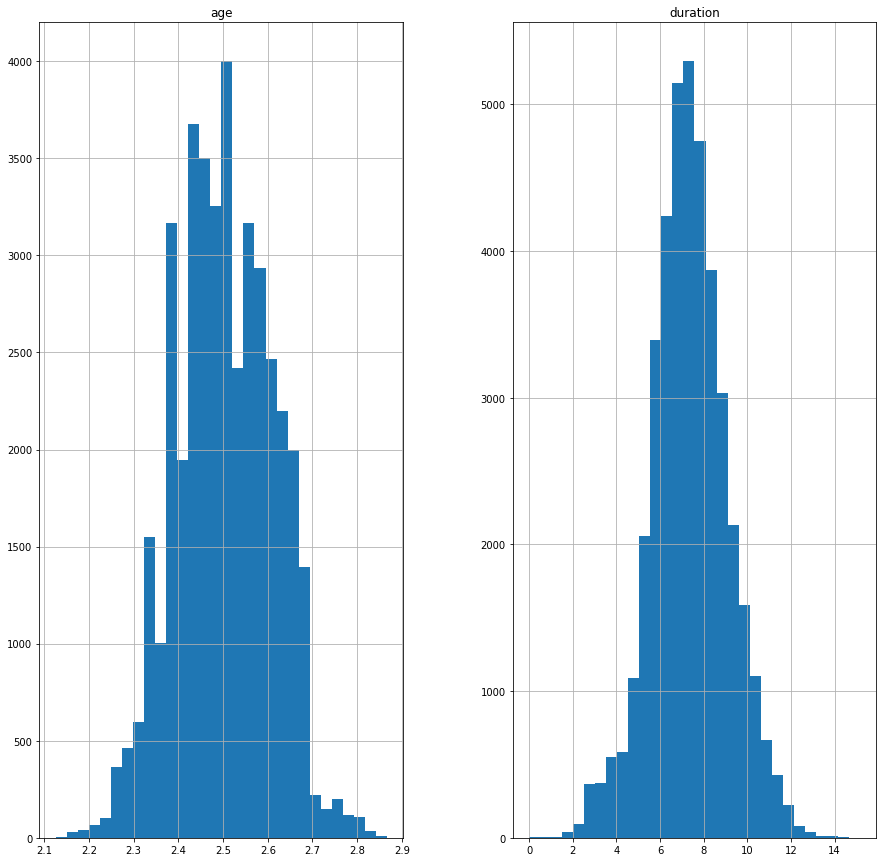

In [59]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation
import scipy.stats as stats
# temporary copy of the data
data = df.copy()
for var in skewed:

    # transform the variable - yeo-johsnon
    data[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
data[skewed].hist(bins=30, figsize=(15,15))
plt.show()

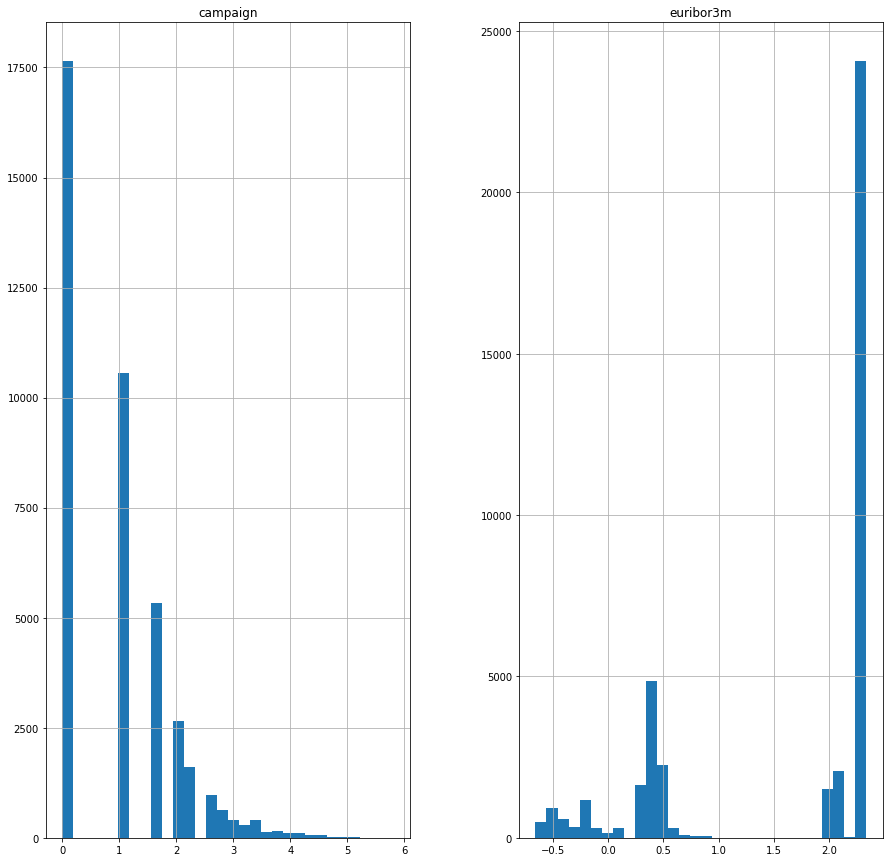

In [60]:
import numpy as np
tmp = df.copy()
for var in[[ 'campaign', 'euribor3m']]:
    tmp[var]= np.log2(df[var])

    
# plot the histograms of the transformed variables
tmp[[ 'campaign', 'euribor3m']].hist(bins=30, figsize=(15,15))
plt.show()

Categorical


In [61]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  10


cardinality

<AxesSubplot:>

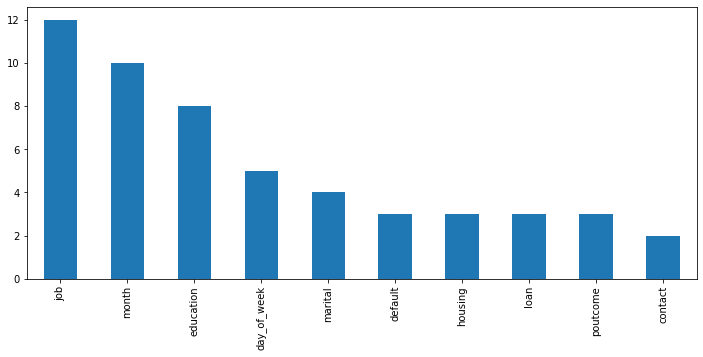

In [62]:

df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [63]:
df[cat_vars].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [64]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [65]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Separating those with High Cardinality

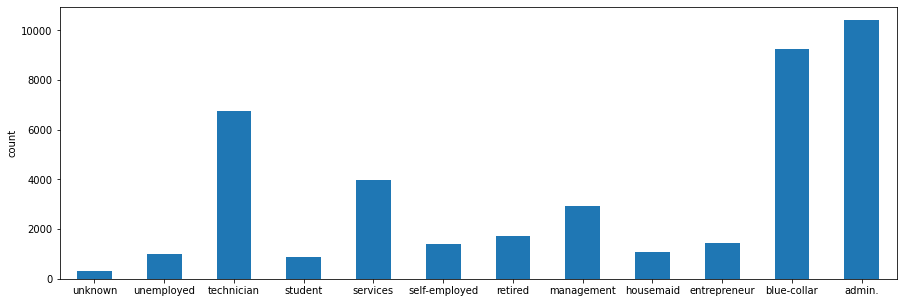

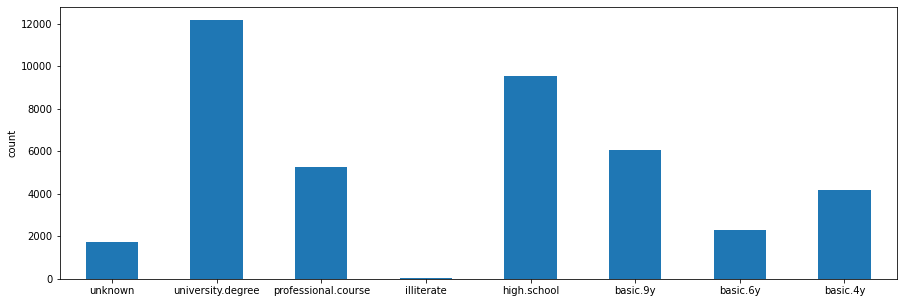

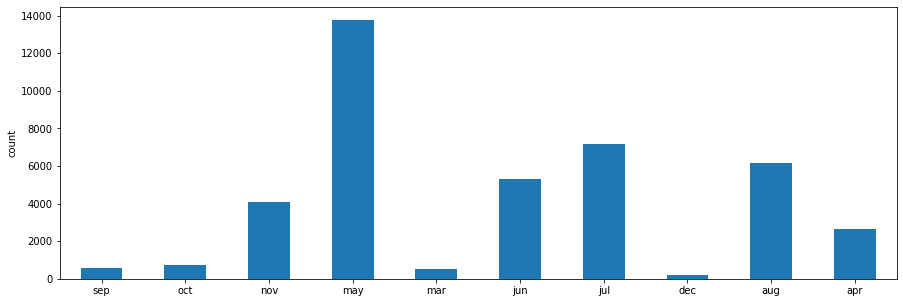

In [66]:

card_vars = ['job', 'education', 'month']

for col in card_vars:
   df[col].value_counts().sort_index(ascending=False).plot(kind='bar', rot=0, ylabel='count', figsize=(15,5))
   plt.show()

    

High cardinality x label

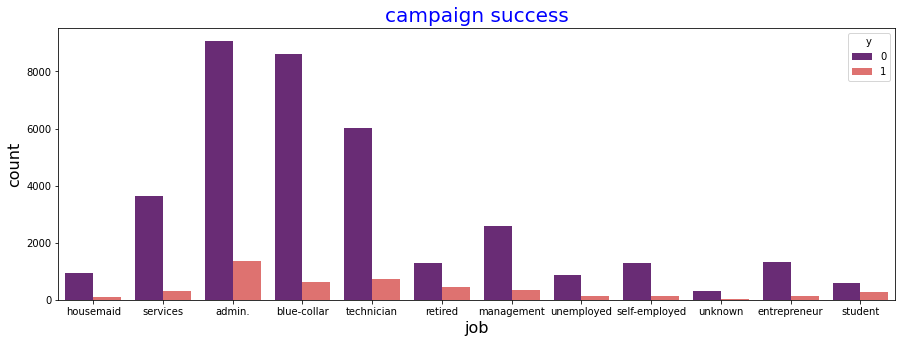

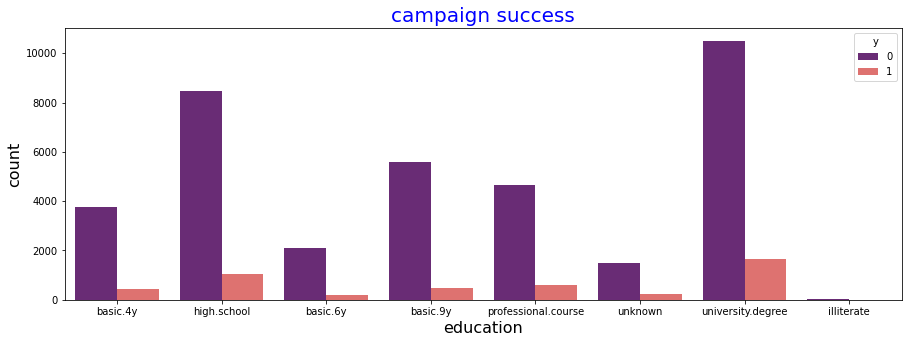

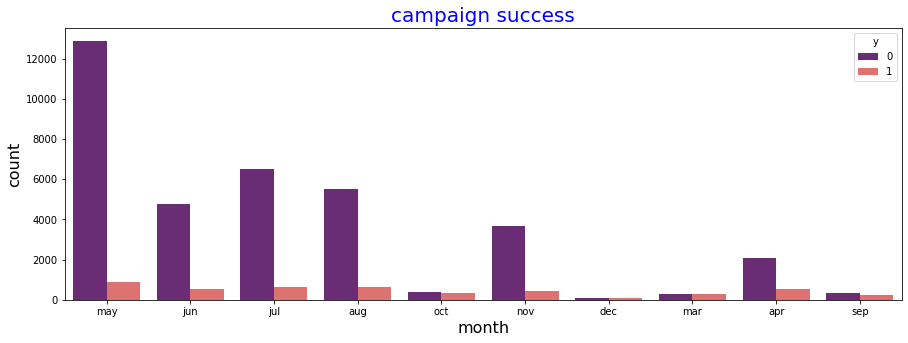

In [67]:
for var in card_vars:
    plt.figure(figsize = (15, 5))
    plt.xlabel("Campaign", fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    cpg = sns.countplot(x = df[var], hue = df["y"], palette = "magma")
    cpg.set_title("campaign success", color = "blue", fontsize = 20)

Checking if we have rare values 

In [68]:
def analyse_rare_labels(df, var, rare_perc):
  df = df.copy()

    # % of observations per category
  tmp = df.groupby(var)['y'].count() / len(df)

  #return rare categories
  return tmp[tmp < rare_perc].index

# print less than 1 % of the observations
card_vars = ['job', 'education', 'month']
for var in card_vars:
  frlabel = analyse_rare_labels(df, var, 0.01)
  print(var, frlabel)
  print()
    

job Index(['unknown'], dtype='object', name='job')

education Index(['illiterate'], dtype='object', name='education')

month Index(['dec'], dtype='object', name='month')



Low Cardinality x label 

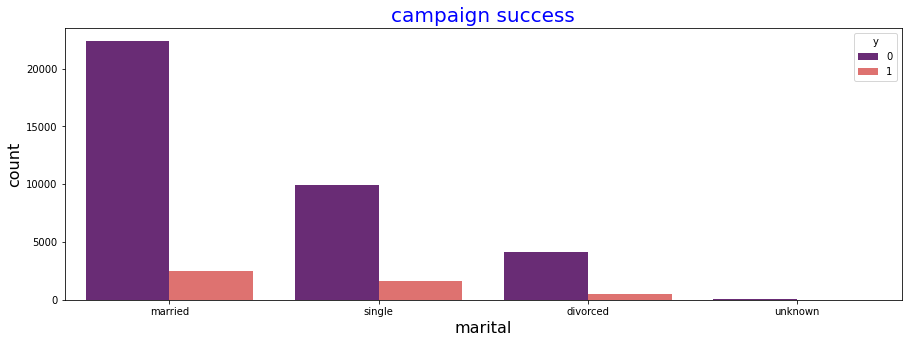

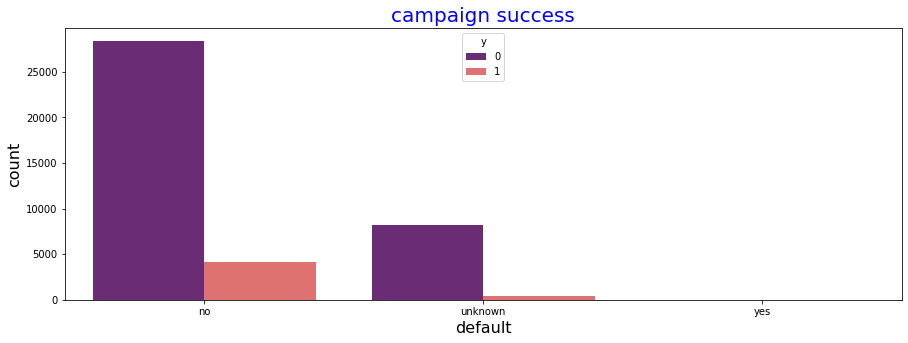

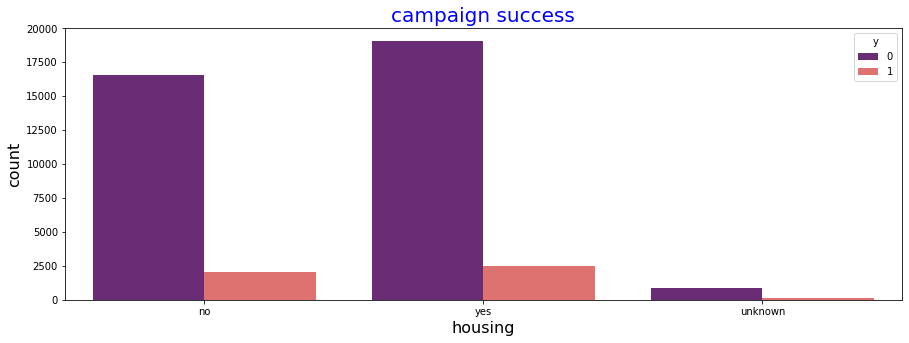

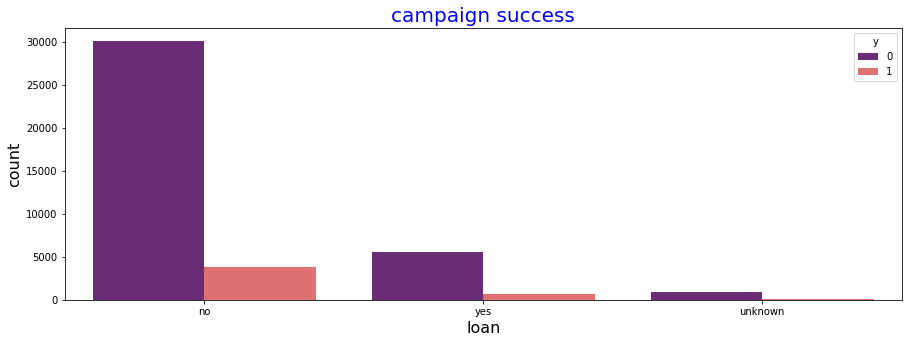

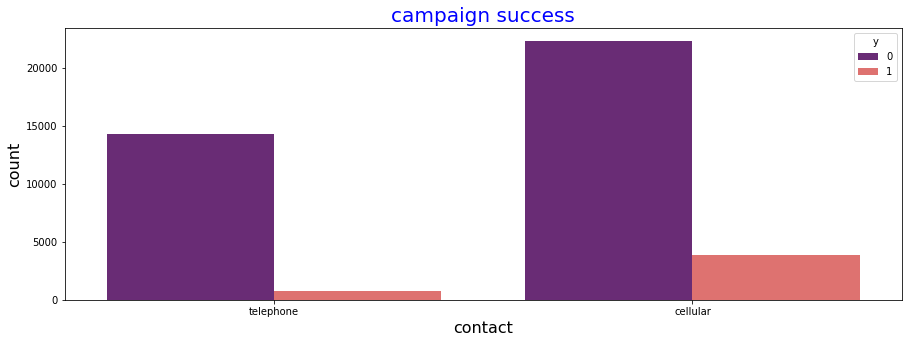

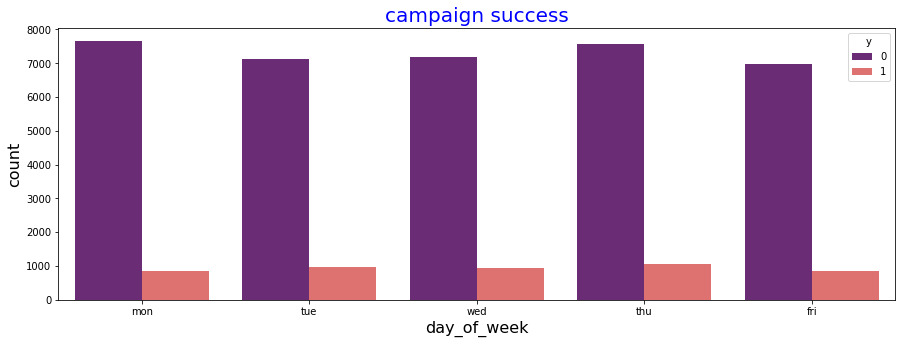

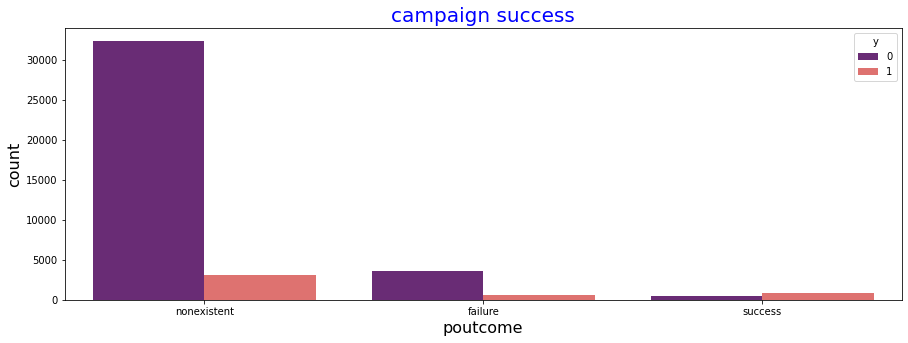

In [69]:
low_card =  [
    var for var in cat_vars if var not in card_vars]
for var in low_card:
    plt.figure(figsize = (15, 5))
    plt.xlabel("Campaign", fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    cpg = sns.countplot(x = df[var], hue = df["y"], palette = "magma")
    cpg.set_title("campaign success", color = "blue", fontsize = 20)

In [70]:
df['y'].value_counts()/len(df)* 100

0    88.734583
1    11.265417
Name: y, dtype: float64

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df,title='Report', explorative = True, html={'style' : {'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file="Telemarketing.html")

In [ ]:
df.fillna(value='unknown')

In [ ]:
df.head(1)

In [72]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [74]:
df.to_csv('bank.csv', index=False)

In [75]:
corr = df.corr()['y']
corr = pd.DataFrame(corr)
corr

,y
age,0.030399
duration,0.405274
campaign,-0.066357
pdays,-0.324914
previous,0.230181
EmpVarRate,-0.298334
ConsPriceIDX,-0.136211
ConsConfIDX,0.054878
euribor3m,-0.307771
NrEmployed,-0.354536


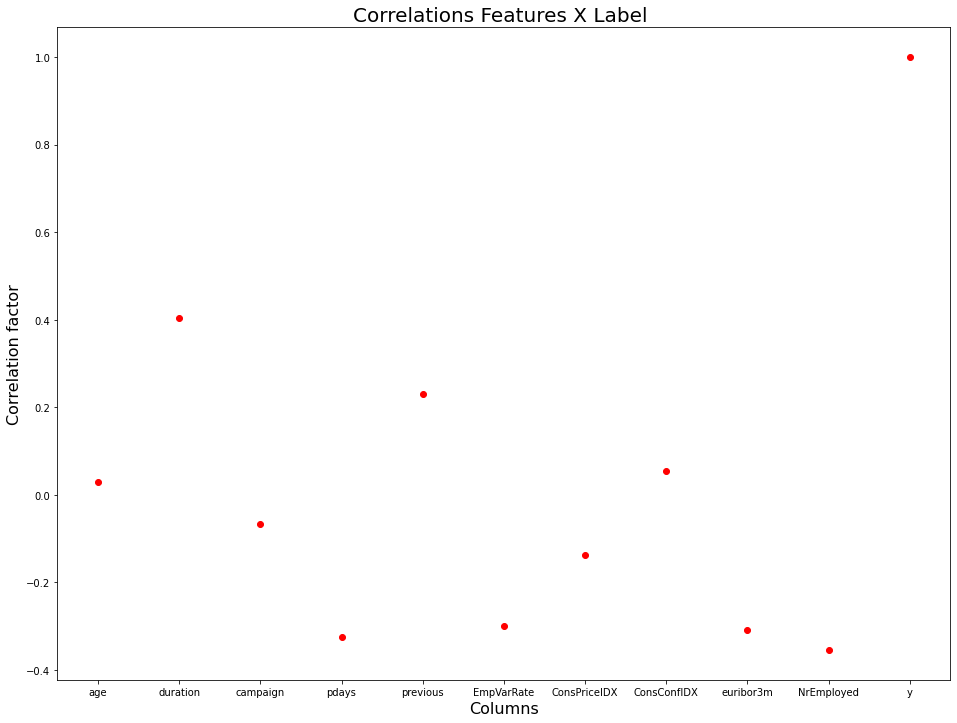

In [76]:
plt.figure(figsize = (16, 12))
plt.title("Correlations Features X Label ", fontsize = 20)
plt.xlabel("Columns", fontsize = 16)
plt.ylabel("Correlation factor", fontsize = 16)
plt.plot(corr, color = "red", linestyle = "", marker = "o")
plt.show()

Text(0.5, 1.0, 'Distribution of Age regarding the campaign success')

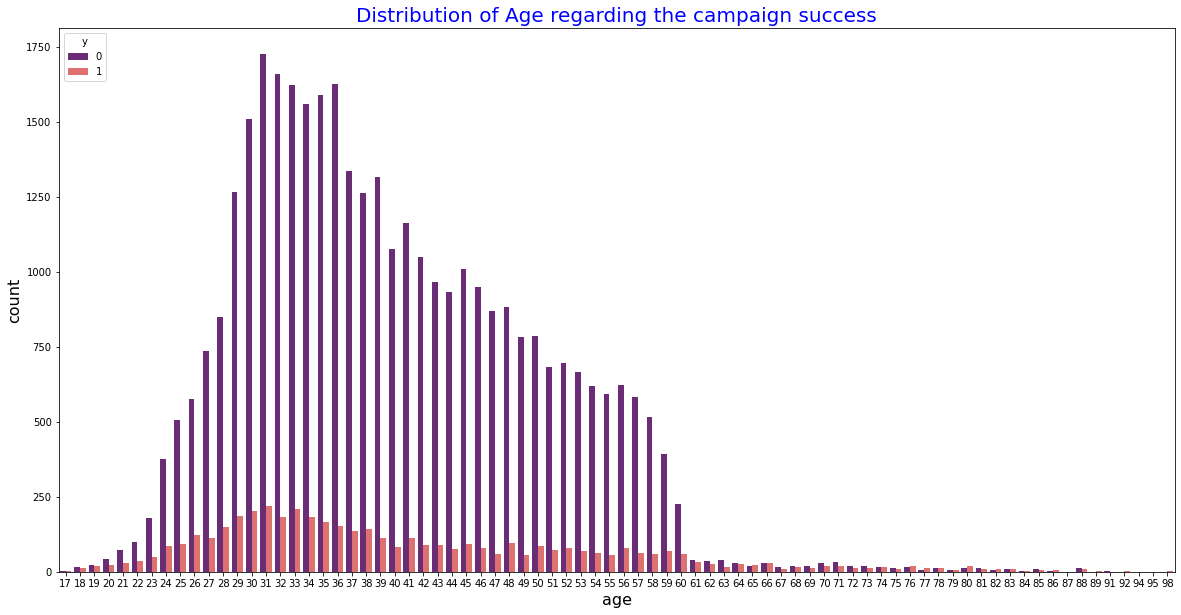

In [77]:
plt.figure(figsize = (20, 10))
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
age = sns.countplot(x = df["age"], hue = df["y"], palette = "magma")
age.set_title("Distribution of Age regarding the campaign success", color = "blue", fontsize = 20)


Text(0.5, 1.0, 'Distribution of job regarding the campaign success')

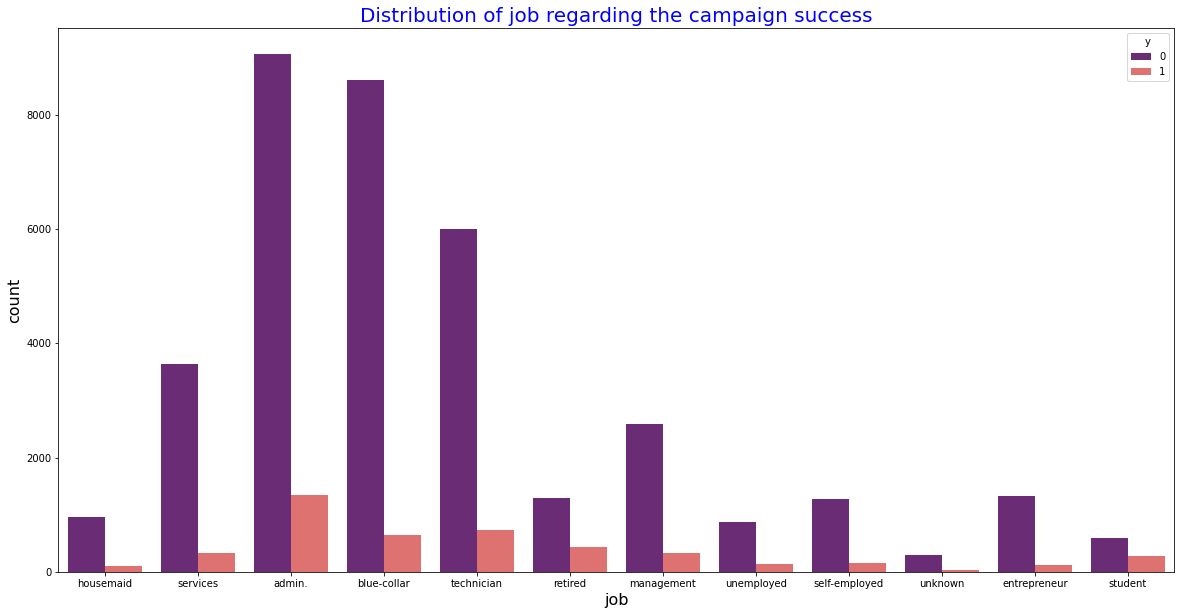

In [78]:
plt.figure(figsize = (20, 10))
plt.xlabel("Job", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
age = sns.countplot(x = df["job"], hue = df["y"], palette = "magma")
age.set_title("Distribution of job regarding the campaign success", color = "blue", fontsize = 20)